# Time Series Analysis of Traffic Data from 511.org
This script explores the role of latent variables in the domain of traffic. Specifically, we examine traffic sensor
data from 511.org to analyze the variations in average speed, travel time, and volume of vehicles passing through
the road links. Volume information is not generally available and hence we would like to treat it as "hidden". 

###Exploring Traffic Data
First, we will import necessary libraries and data before introducing the dataset.

In [61]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 7)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.lib import Timestamp
from datetime import datetime, timedelta

linkstatus = pd.read_csv('data/linkstatus-with-volume.csv')
print np.shape(linkstatus)
type(linkstatus)

Populating the interactive namespace from numpy and matplotlib
(8310267, 7)


`%matplotlib` prevents importing * from pylab and numpy


pandas.core.frame.DataFrame

Select data for a particular link and plot the variations in speed, travel time, and volume

In [62]:
linkdata = linkstatus[linkstatus['linkid'] == 101170]
print np.shape(linkdata)

(30222, 7)


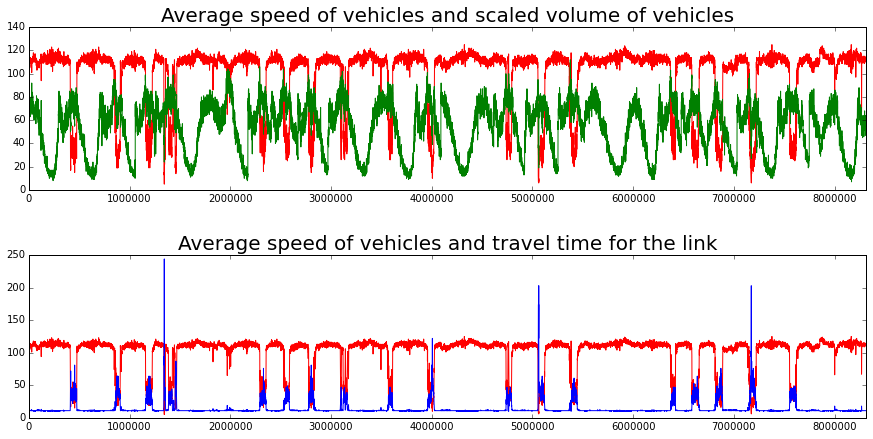

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1)
# Plotting speed and volume of vehicles 
linkdata['linkspeed'].plot(ax=axes[0],color='r')
linkdata['linkvolume'].apply(lambda x: x/100).plot(ax=axes[0], color='g')
axes[0].set_title('Average speed of vehicles and scaled volume of vehicles', fontsize=20)

# Plotting speed and travel time observations
linkdata['linkspeed'].plot(ax=axes[1],color='r')
linkdata['linktraveltime'].plot(ax=axes[1],color='b')
axes[1].set_title('Average speed of vehicles and travel time for the link', fontsize=20)
plt.subplots_adjust(hspace = 0.4)

The first figure is a plot of volume of vehicles passing through the link and the average speed of those vehicles passing through the link with ID 101170. When the volume of vehicles passing through the link increases, we observe a rediction in speed throughout the plot. This shows the inverse correlation between volume of vehicles at a link and the average speed of vehicles through the link. 

The second figure is a plot of speed and travel time for the link with ID 101170. As the average speed of vehicles inceases, there is a reduction in the travel time. As the average speed of vehicles through the link decreases, the travel time increases. We notice some steep increase in travel time in the plot.

In [64]:
linkdata.iloc[:,6] = linkdata['timestamp'].apply(lambda x: Timestamp(x).strftime("%Y-%m-%d %H:%M:%S"))
print np.shape(linkdata['timestamp'])

(30222,)


In [65]:
start_date = '2012-10-08 00:00:00'
end_date = '2012-10-14 23:59:59'

'''This function returns a number depending on the day of the week
Monday - 0, ... , Sunday - 6    '''
def getdayofweek(timestamp):
    dt = datetime.strptime(timestamp.__str__(), "%Y-%m-%d %H:%M:%S")
    tt = dt.timetuple()
    return tt.tm_wday

linkdataOneWeek = linkdata[(linkdata['timestamp'] > start_date) 
                           & (linkdata['timestamp'] < end_date)]

print np.shape(linkdataOneWeek)
# Printing the number of data points and the rage of days in the selected data
print 'Day of week = ' + getdayofweek(start_date).__str__() + ' (Monday)'
print 'Day of week = ' + getdayofweek(end_date).__str__() + ' (Sunday)'

(6136, 7)
Day of week = 0 (Monday)
Day of week = 6 (Sunday)


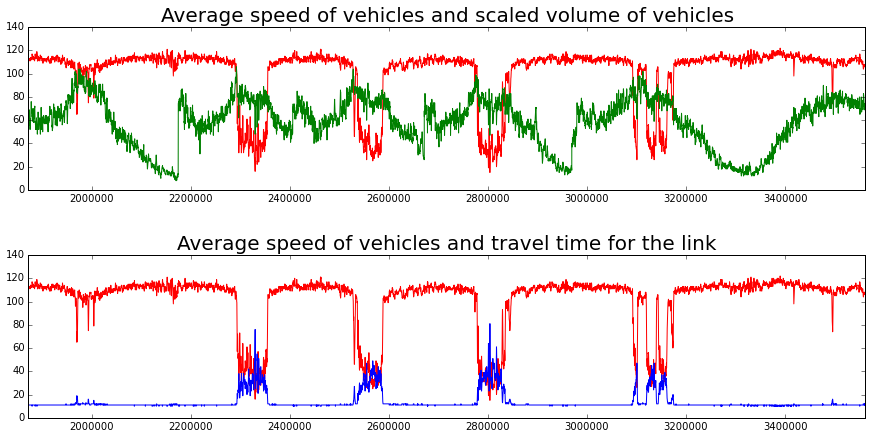

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1)
# Plotting speed and volume of vehicles 
linkdataOneWeek['linkspeed'].plot(ax=axes[0],color='r')
linkdataOneWeek['linkvolume'].apply(lambda x: x/100).plot(ax=axes[0], color='g')
axes[0].set_title('Average speed of vehicles and scaled volume of vehicles', fontsize=20)

# Plotting speed and travel time observations
linkdataOneWeek['linkspeed'].plot(ax=axes[1],color='r')
linkdataOneWeek['linktraveltime'].plot(ax=axes[1],color='b')
axes[1].set_title('Average speed of vehicles and travel time for the link', fontsize=20)
plt.subplots_adjust(hspace = 0.4)

First plot consists of speed and scaled volume data over a week starting from Monday to Sunday. It is interesting to observe that, only when the volume reaches a certain threshold, we observe a decrease in speed! This validates our intuition of link loading. That is, only when the link is loded sufficiently enough, events in the real-world would manifest as delays. For example, if there is an accident at off-peak hours, we may not be able to observe its manifestation in speed variations.

We now look at the hourly plots for a day for better insights.

(1218, 7)


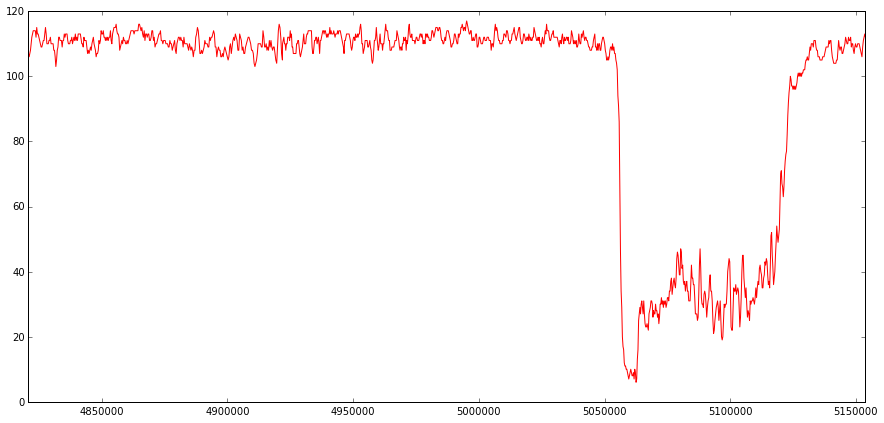

In [214]:
start_day = '2012-10-25 00:00:00'
end_day = '2012-10-26 01:00:00'
fig, axes = plt.subplots(nrows=1, ncols=1)
linkdataOneDay = linkdata[(linkdata['timestamp'] > start_day) 
                                      & (linkdata['timestamp'] < end_day)]
linkdataOneDay['linkspeed'].plot(ax=axes,color='r')
print np.shape(linkdataOneDay)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


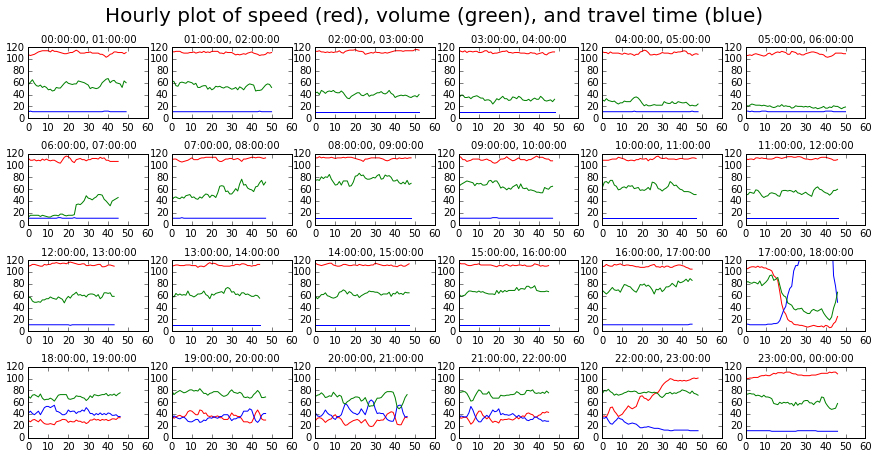

In [215]:
start_day = '2012-10-25 00:00:00'
end_day = '2012-10-26 01:00:00'

# Supporting function to derive the index while plotting hourly data
def getrowandcolumnindex(index):
    print index
    lc = 0
    for i in [0, 1, 2, 3]:
        for j in [0, 1, 2, 3, 4, 5]:
            if lc == index - 1:
                return i, j
            lc = lc + 1
            
# Select data for a day and then analyze it hourly 
linkdataOneDay = linkdata[(linkdata['timestamp'] > start_day) 
                                      & (linkdata['timestamp'] < end_day)]
stime = linkdataOneDay['timestamp']
start = Timestamp(stime.iloc[0]).strftime("%Y-%m-%d 00:00:00")
end = stime.iloc[np.size(stime) - 1]
fig, axes = plt.subplots(nrows=4, ncols=6)

# Iterate though hourly data to create hourly plots
rowindex = 0
columnindex = 0
for freq in ['H']:
    rng = pd.date_range(start, end, freq=freq)
    loopcount = 0
    for timeindex in rng:
        if loopcount == 0:
            start = timeindex
            loopcount = loopcount + 1
        else:
            end = timeindex
            hourlydata = linkdataOneDay[(linkdataOneDay['timestamp'] > start.__str__()) & 
                                              (linkdataOneDay['timestamp'] < end.__str__())]
            rowindex, columnindex = getrowandcolumnindex(loopcount) 
            hourlydata['linkspeed'].plot(ax=axes[rowindex,columnindex], use_index=False, color='r'); 
            axes[rowindex,columnindex].set_title(start.__str__().split(' ')[1] + ', ' + 
                                                 end.__str__().split(' ')[1], fontsize=10)
            hourlydata['linktraveltime'].plot(ax=axes[rowindex,columnindex], use_index=False, color='b'); 
            axes[rowindex,columnindex].set_title(start.__str__().split(' ')[1] + ', ' + end.__str__().split(' ')[1], 
                                                 fontsize=10)
            hourlydata['linkvolume'].apply(lambda x: x/100).plot(ax=axes[rowindex,columnindex], 
                                                                 use_index=False, color='g', xlim=(0,60), 
                                                                 ylim=(0,120)); 
            axes[rowindex,columnindex].set_title(start.__str__().split(' ')[1] + ', ' + end.__str__().split(' ')[1], 
                                                 fontsize=10)
            start = end 
            loopcount = loopcount + 1
            
plt.subplots_adjust(hspace = 0.5)
fig.suptitle ("Hourly plot of speed (red), volume (green), and travel time (blue)", fontsize=20)

###Performing Time Series Analysis
In this section, we explore some of the techniques for analyzing time series data. We try utilizing Gaussian Mixture Model (GMM), Auto-Regressive (AR) models, and Linear Dynamical System (LDS) model for analyzing this data and comment on its capabilities and limitations.
####Gaussian Mixture Model
Consider increasing and decreasing dynamics of speed observations. We will generate synthetic data for the purpose of demonstration.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


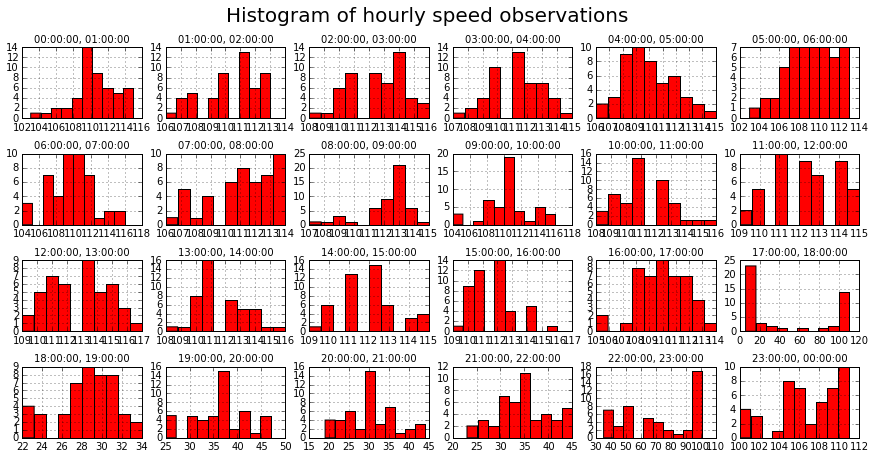

In [216]:
stime = linkdataOneDay['timestamp']
start = Timestamp(stime.iloc[0]).strftime("%Y-%m-%d 00:00:00")
end = stime.iloc[np.size(stime) - 1]
fig, axes = plt.subplots(nrows=4, ncols=6)

# Iterate though hourly data to create hourly plots
rowindex = 0
columnindex = 0
for freq in ['H']:
    rng = pd.date_range(start, end, freq=freq)
    loopcount = 0
    for timeindex in rng:
        if loopcount == 0:
            start = timeindex
            loopcount = loopcount + 1
        else:
            end = timeindex
            hourlydata = linkdataOneDay[(linkdataOneDay['timestamp'] > start.__str__()) & 
                                              (linkdataOneDay['timestamp'] < end.__str__())]
            rowindex, columnindex = getrowandcolumnindex(loopcount) 
            hourlydata['linkspeed'].hist(ax=axes[rowindex,columnindex], color='r'); 
            #hourlydata['linkspeed'].plot(ax=axes[rowindex,columnindex], use_index=False, color='r'); 
            axes[rowindex,columnindex].set_title(start.__str__().split(' ')[1] + ', ' + 
                                                 end.__str__().split(' ')[1], fontsize=10)
            start = end 
            loopcount = loopcount + 1
            
plt.subplots_adjust(hspace = 0.5)
fig.suptitle ("Histogram of hourly speed observations", fontsize=20)

Note that the histogram has multiple peaks which can be modeled using a GMM. A GMM model consists of a fixed number of Gaussian distributions (hence called a mixture) from which the observations are sampled. The number of mixtures are specified as an input while fitting a GMM model to the data. 

From the previous plot of hourly speed, volume, and travel time observations, from 17:00 to 18:00, we observe a decreasing speed dynamics. While from 22:00 to 23:00 we observe increasing dynamics. However, the histograms are unable to capture this distinction. Thus, the idea of using a GMM model to summarize the histograms is not suitable for modeling traffic dynamics. Note that GMM can indeed be very useful to uncover grouping, e.g., for a histogram over the entire day, you will be able to observe at least one cluster on lower side indicating slow traffic during peak hour as shown in the figure below.

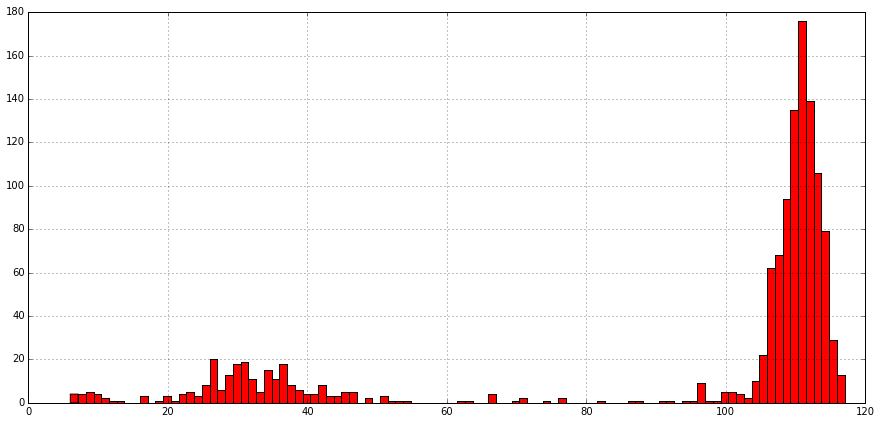

In [217]:
linkdataOneDay['linkspeed'].hist(color='r', bins=100)

####Auto-Regressive Models
Auto-Regressive models are widely used in time series analysis tasks. We will use Auto-Regessive Moving Average (ARMA) and Auto-Regressive Integrated Moving Average (ARIMA) models to build models for speed and travel time observations. The parameters of these models are not updated based on evidence we observe while a Bayesian approach helps us to update the parameters as we observe more evidence.

In [223]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

print np.shape(linkdataOneWeek['linkspeed'])
print np.shape(linkdataOneDay['linkspeed'])

(6136,)
(1218,)


#####ARMA Models
We will now use ARMA models to study the hourly speed observations and analyze its fit to the data.

In [255]:
# Now, we will try to run ARMA on the traffic sensor data
linkdataOneDay = linkdata[(linkdata['timestamp'] > start_day) 
                                      & (linkdata['timestamp'] < end_day)]
arma_mod20 = sm.tsa.ARMA(linkdataOneDay['linkspeed'].values, (2,0)).fit()
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(linkdataOneDay['linkspeed'].values, (3,0)).fit()
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

arma_mod21 = sm.tsa.ARMA(linkdataOneDay['linkspeed'].values, (2,1)).fit()
print(arma_mod21.params)
print(arma_mod21.aic, arma_mod21.bic, arma_mod21.hqic)

arma_mod31 = sm.tsa.ARMA(linkdataOneDay['linkspeed'].values, (3,1)).fit()
print(arma_mod31.params)
print(arma_mod31.aic, arma_mod31.bic, arma_mod31.hqic)

arma_mod302 = sm.tsa.ARMA(linkdataOneDay['linkspeed'].values, (3,0,2)).fit()
print(arma_mod302.params)
print(arma_mod302.aic, arma_mod302.bic, arma_mod302.hqic)

[ 97.9241421    1.31144998  -0.31505406]
(5305.454130268276, 5325.8739920613552, 5313.1404814564439)
[  9.79725008e+01   1.31456916e+00  -3.28002163e-01   9.85772488e-03]
(5307.335640504928, 5332.8604677462772, 5316.9435794901383)
[  9.79665975e+01   1.29019379e+00  -2.93861304e-01   2.36401569e-02]
(5307.364876586855, 5332.8897038282039, 5316.972815572065)
[ 97.85753263   0.43647      0.85169444  -0.2949609    0.86984439]
(5307.160105293861, 5337.7898979834799, 5318.6896320761134)
[  9.79725008e+01   1.31456916e+00  -3.28002163e-01   9.85772488e-03]
(5307.335640504928, 5332.8604677462772, 5316.9435794901383)


In [242]:
print sm.stats.durbin_watson(arma_mod20.resid)
print sm.stats.durbin_watson(arma_mod30.resid)
print sm.stats.durbin_watson(arma_mod21.resid)
print sm.stats.durbin_watson(arma_mod31.resid)

1.98015269267
1.98744929685
1.98571396359
1.96506945902


The Durbin-Watson statistic is close to 2 indicating that the errors are not correlated. Durbin-Watson statistic ranges between 0 and 4. If the value is toward 0, it indicates positive autocorrelation. If the value is toward 4, it indicates negative autocorrelation. If the value is toward 2, indicates no autocorrelation.

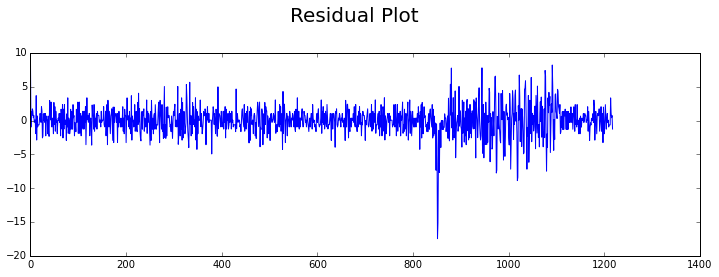

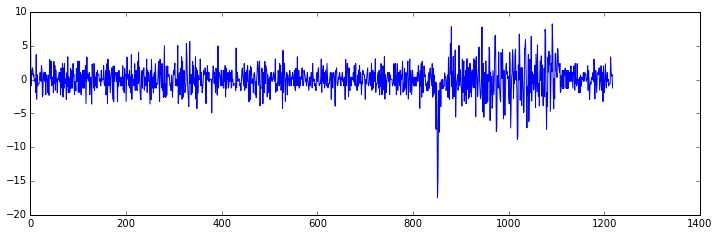

In [331]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
ax = ax.plot(arma_mod20.resid);
fig.suptitle ("Residual Plot", fontsize=20)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(212)
ax = ax.plot(arma_mod30.resid);

In [244]:
resid20 = arma_mod20.resid
resid30 = arma_mod30.resid
resid21 = arma_mod21.resid
resid31 = arma_mod31.resid

print stats.normaltest(resid20)
print stats.normaltest(resid30)
print stats.normaltest(resid21)
print stats.normaltest(resid31)

(274.38260672461729, 2.6216456134359923e-60)
(274.12314790559873, 2.984796668721993e-60)
(274.14050511649509, 2.9590048763683094e-60)
(276.4800853602099, 9.1857006021662789e-61)


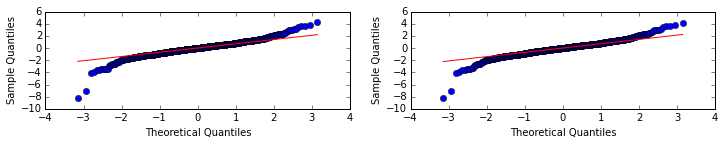

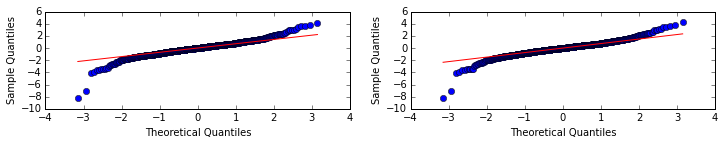

In [245]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(421)
fig = qqplot(resid20, line='q', ax=ax1, fit=True)
ax2 = fig.add_subplot(422)
fig = qqplot(resid30, line='q', ax=ax2, fit=True)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(421)
fig = qqplot(resid21, line='q', ax=ax1, fit=True)
ax2 = fig.add_subplot(422)
fig = qqplot(resid31, line='q', ax=ax2, fit=True)

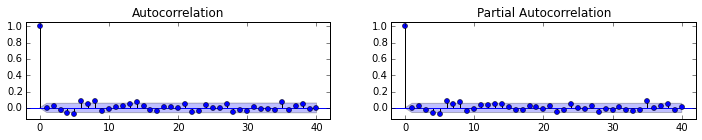

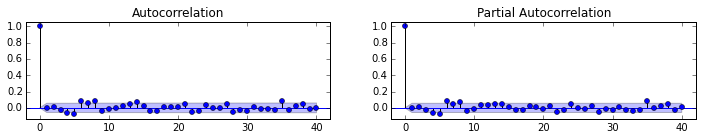

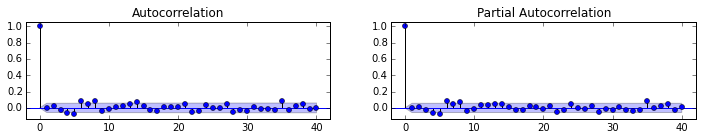

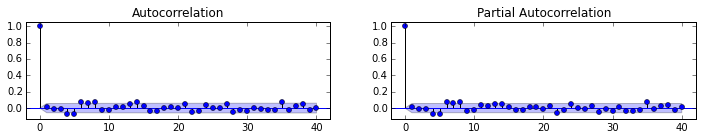

In [247]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(421)
fig = sm.graphics.tsa.plot_acf(resid30, lags=40, ax=ax1)
ax2 = fig.add_subplot(422)
fig = sm.graphics.tsa.plot_pacf(resid30, lags=40, ax=ax2)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(421)
fig = sm.graphics.tsa.plot_acf(resid20, lags=40, ax=ax1)
ax2 = fig.add_subplot(422)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(421)
fig = sm.graphics.tsa.plot_acf(resid21, lags=40, ax=ax1)
ax2 = fig.add_subplot(422)
fig = sm.graphics.tsa.plot_pacf(resid21, lags=40, ax=ax2)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(421)
fig = sm.graphics.tsa.plot_acf(resid31, lags=40, ax=ax1)
ax2 = fig.add_subplot(422)
fig = sm.graphics.tsa.plot_pacf(resid31, lags=40, ax=ax2)

In [248]:
r,q,p = sm.tsa.acf(resid20, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

           AC          Q  Prob(>Q)
lag                               
1    0.002393   0.006991  0.933366
2    0.010763   0.148541  0.928420
3   -0.028326   1.129867  0.769869
4   -0.059178   5.416434  0.247173
5   -0.079959  13.248682  0.021157
6    0.087415  22.617375  0.000935
7    0.053575  26.139348  0.000476
8    0.084402  34.887717  0.000028
9   -0.034476  36.348571  0.000034
10  -0.020035  36.842311  0.000060
11   0.004338  36.865479  0.000121
12   0.023156  37.526144  0.000183
13   0.044354  39.952160  0.000141
14   0.072999  46.528946  0.000023
15   0.018121  46.934548  0.000038
16  -0.032459  48.237067  0.000044
17  -0.038738  50.093765  0.000041
18   0.007814  50.169381  0.000071
19   0.013060  50.380760  0.000115
20   0.005637  50.420170  0.000193
21   0.046172  53.066617  0.000135
22  -0.047529  55.873334  0.000089
23  -0.033722  57.287424  0.000093
24   0.039285  59.208108  0.000083
25   0.000199  59.208157  0.000134
26   0.003269  59.221476  0.000213
27   0.047438  62.02

The p-values are below 0.05 for lag 5 and above indicating that the data has no correlations at higher lags (lag > 5).

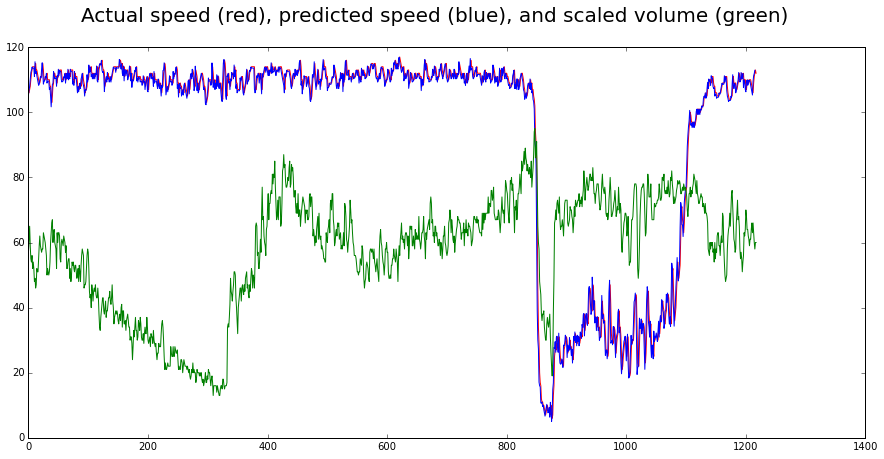

In [514]:
from sklearn.metrics import mean_squared_error

# This function is from http://bicorner.com/2015/11/16/time-series-analysis-using-ipython/
def mean_forecast_err(y, yhat):
    return np.subtract(y, yhat).mean()
# This function is from http://bicorner.com/2015/11/16/time-series-analysis-using-ipython/
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(np.subtract(y, yhat).mean()) / yhat)) # or percent error = * 100

prediction_model = arma_mod20
# This loop utilizes the learned parameters of the ARMA model for prediction
predictedVals = []
for i in range(2, len(linkdataOneDay['linkspeed'].values)):
    predictedVal = prediction_model.params[1] * linkdataOneDay['linkspeed'].values[i-1] + \
    prediction_model.params[2] * linkdataOneDay['linkspeed'].values[i-2] #+ \
    #prediction_model.params[3] * linkdataOneDay['linkspeed'].values[i-3]
    predictedVals.append(predictedVal) 

fig, ax = plt.subplots(nrows=1, ncols=1)
plot(linkdataOneDay['linkspeed'].values, axes=ax, color = 'r')
plot(predictedVals, axes=ax, color='b')
plot(linkdataOneDay['linkvolume'].values/100, color = 'g')
fig.suptitle ("Actual speed (red), predicted speed (blue), and scaled volume (green)", fontsize=20)

In [515]:
start_index = len(linkdataOneDay['linkspeed'].values) - len(predictedVals)
computeRMSE(linkdataOneDay['linkspeed'].values[start_index:len(linkdataOneDay['linkspeed'].values)], predictedVals)
computeRsquared(linkdataOneDay['linkspeed'].values[start_index:len(linkdataOneDay['linkspeed'].values)], predictedVals)

(1216,) (1216,)
2.15341737581
0.995476313582


0.99547631358177369

In [516]:
MFE = mean_forecast_err(linkdataOneDay['linkspeed'].values[start_index:len(linkdataOneDay['linkspeed'].values)], 
                  predictedVals)
MAE = mean_absolute_err(linkdataOneDay['linkspeed'].values[start_index:len(linkdataOneDay['linkspeed'].values)], 
                  predictedVals)
print "Mean Forecast Error = " + MFE.__str__()
print "Mean Absolute Error = " + MAE.__str__()

Mean Forecast Error = 0.343263097542
Mean Absolute Error = 0.00519350579325


####Linear Dynamical Systems
A LDS model also known as Kalman Filters:
(1) Address the limitation of GMM by providing mechanisms to capture time series based observations.
(2) Performs parameter updates as we observe new observations of the time series.
(3) Provides a best theoretical fit the problem of modeling both hidden and observed variables. 

Concretely, we want to show that: (1) The parameters adapt as we perform learning with LDS and (2) there is a change in the hidden variable state when the volume of traffic affects the speed, i.e., the hidden variable switches when the volume affects/not-affects the speed observations.  

We will now learn parameters for a Linear Dynamical System using linkspeed as observed quantity and one hidden state for the volume which is not generally provided in the real-world data. We will utilize a Kalman Filter library for python called pykalman: https://pykalman.github.io/

In [458]:
from pykalman import KalmanFilter

kf = KalmanFilter(n_dim_state = 1, n_dim_obs=1)
observations = linkdataOneDay.as_matrix(columns=['linkspeed'])
kf = kf.em(observations, n_iter=50, em_vars=['transition_matrices','observation_matrices', 
                                             'transition_covariance', 'observation_covariance'])
A = kf.transition_matrices
B = kf.observation_matrices
Q = kf.transition_covariance
R = kf.observation_covariance
print A
print B
print Q
print R

[[ 0.99990039]]
[[ 1.00933808]]
[[ 11.98691612]]
[[ 17.40576771]]


The LDS parameters learned from speed observations are printed above. We learn the tansition matrix $\mathbf{A}$, observation matrix $\mathbf{B}$, transition covariance $\mathbf{Q}$, and observation covariance $\mathbf{R}$. A Linear Dynamical System consists of hidden states and observed states. Hidden states evolve based on the tansition matrix $\mathbf{A}$ and the observed state depends only on the current hidden state governed by the observation matrix $\mathbf{B}$. 
$$\mathbf{h_{t}} = \mathbf{A} \mathbf{h_{t-1}} + \mathcal{N}(0,\mathbf{Q})$$
$$\mathbf{v_{t}} = \mathbf{B} \mathbf{h_{t}} + \mathcal{N}(0,\mathbf{R})$$

Mean Forecast Error = 0.122592184444
Mean Absolute Error = 0.00182508002196


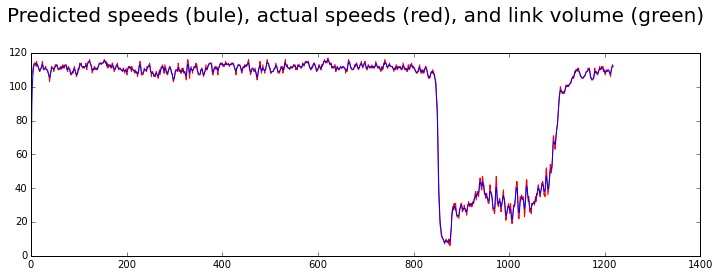

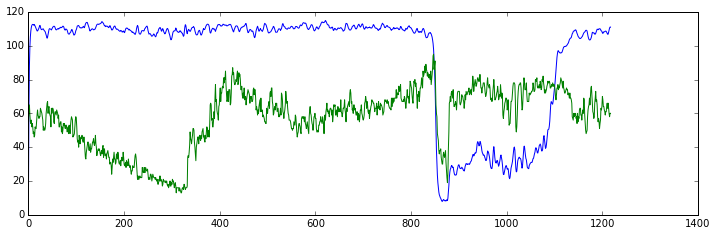

In [513]:
from scipy.stats import norm

# Get all the hidden states
filter_result = kf.smooth(observations)
# Get observations from hidden states using the observation matrix
predSpeedVals = filter_result[0] * B 
# Plot all the time series data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
ax.plot(linkdataOneDay['linkspeed'].values, color = 'r');
ax.plot(predSpeedVals, color = 'b');
fig.suptitle ("Predicted speeds (bule), actual speeds (red), and link volume (green)", fontsize=20)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(212)
ax.plot(filter_result[0], color = 'b');
ax.plot(linkdataOneDay['linkvolume'].values/100, color = 'g');

# Compute the errors in prediction/forecasting
MFE = mean_forecast_err(linkdataOneDay['linkspeed'].values[start_index:len(linkdataOneDay['linkspeed'].values)], 
                  predSpeedVals)
MAE = mean_absolute_err(linkdataOneDay['linkspeed'].values[start_index:len(linkdataOneDay['linkspeed'].values)], 
                  predSpeedVals)
print "Mean Forecast Error = " + MFE.__str__()
print "Mean Absolute Error = " + MAE.__str__()

The first plot contains actual speed observations (red) and the predicted speed observations (blue). The prediction follows well with the actual speed values. Mean Forecast Error = 0.1225 and Mean Absolute Error = 0.0018 which are less than those for the ARMA model. The second plot consists of the estimated hidden states and the scaled volume of vehicles over a day. The hidden state switches to lower values for a particular threshold of volume. The predicted speed in the first plot (blue line) is obtained by using the emission matrix for each estimated hidden state. We observe that the LDS model has the best MFE and MAE compared to other models. 